#  Barclays x GA: Python Day 4 - Statistics and models

---

<a id="learning-objectives"></a>
## Learning Objectives
*After completing this notebook, you will be able to:*

- Code up a predictive model where the coefficients are already known
- Run simple linear regression in Python


## Contents:
* [Introduction to Linear regression](#regression)


<a id="cleaning"></a>

# <font color='blue'> What is linear regression?


Linear regression is a way of modelling some depdendent variable $y$ as a linear combination of one or more independent variables $x$.

We are often taught the formula for a straight line is: $y = mx + b$.

This can alternatively be written as: $$y = \beta_{0} + \beta_{1} x$$

## What are the independent and dependent variables in this formula?

In regression tasks, the **dependent** variable is continuous. In classification tasks, the **dependent** variable is categorical. 

An example of a regression problem could be: Predicting Google's share price.
An example of a classification task could be: Predicting a person's favourite fruit.

It's important to note that features in both classification and regression tasks can be a combination of continuous and categorical (we often need to transform categorical features into continuous ones or vice versa depending on the type of model we're using). 

## What do we mean by linear?

An equation is **linear** if the highest degree of any of the the independent variables (i.e. $x$) is 1. If there's a term containing $x^2$ for example, the equation is no longer linear because the independent variable is being raised to a power higher than 1. 


## What does 'training' or 'fitting' a linear regression model mean?

Linear regression is our first example of supervised learning. In supervised learning tasks, we:

1. Obtain a dataset that consists of lots of data points, where each point consists of:

    * A value for our label/response/target/dependent variable $y$
    * Corresponding values for our features/predictors/independent variables $x$
    
    You can think of a single 'data point' or 'observation' as corresponding to a single row in a Pandas dataframe
    
2. Split the dataset into a training set that we'll use to fit or train our model, and a testing set that we'll use to evaluate our model's accuracy. A typical split is 80% of our data will be used for training, and 20% for testing. 

3. Train or fit our model. This will be different for different models. 

In linear regression, training is the process of finding the linear equation that best fits our data.

In other words, we're finding the $\beta$ values or **model coefficients** that give us the line of best fit:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are trying to find the line (mathematically) that minimizes the **sum of squared residuals** (or "sum of squared errors").
- Once we've learned these coefficients, we can use the model to predict the values for $y$, the dependent variable (or 'response') for new data points where we only have access to $x$, the features.


Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. We need evaluation metrics designed for comparing continuous values.

Here are three common evaluation metrics for regression problems:

**Mean absolute error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean squared error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root mean squared error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Let's compare these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. Also, MSE is continuous and differentiable, making it easier to use than MAE for optimization.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

## Why use linear regression?

Advantages of linear regression:

- Simple to explain.
- Highly interpretable.
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Well understood.

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response.
- Performance is (generally) not competitive with the best supervised learning methods due to high bias.
- Can't automatically learn feature interactions.


<a id="cleaning"></a>

# <font color='blue'> Simple linear regression

Let's work through a simple example with dummy data to understand how linear regression works. 

Imagine we have a data frame that describes house prices together with each house's internal area and number of bedrooms. (Note: this is dummy data!)

Let's start by trying to model house price using a ***single variable only***: internal area.

The general form of the equation we're trying to fit to our data is:

`house price = a0 + a1*internal area`

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression # import
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [15]:
house_df = pd.DataFrame({'house_price':[440000, 200000, 670000, 120000, 800000, 200000, 800000, 760000, 340000, 110000],
                         'internal_area_sq_m':[100, 24, 120, 28, 150, 52, 160, 156, 117, 32],
                        'bedrooms':[2, 1, 3, 1, 4, 2, 5, 4, 2, 1]})
house_df.head()

,house_price,internal_area_sq_m,bedrooms
0,440000,100,2
1,200000,24,1
2,670000,120,3
3,120000,28,1
4,800000,150,4


We split our data 80/20 into a training and a testing set.

We'll train the model on the training set, and test how well it generalises on the testing set.


In [18]:
X = house_df[['internal_area_sq_m']] # features
y = house_df['house_price'] # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
house_df.shape

In [19]:
X_train

,internal_area_sq_m
5,52
0,100
7,156
2,120
9,32
4,150
3,28
6,160


In [20]:
y_train

5    200000
0    440000
7    760000
2    670000
9    110000
4    800000
3    120000
6    800000
Name: house_price, dtype: int64

In [21]:
X_test

,internal_area_sq_m
8,117
1,24


In [22]:
y_test

8    340000
1    200000
Name: house_price, dtype: int64

## Use scikit-learn to fit our model and make predictions

This bit is super simple with scikit-learn! We import scikit-learn, initialise the linear regression model, and then fit it to our data:

**Step 1:** Import the class you plan to use from scikit-learn

In [23]:
from sklearn.linear_model import LinearRegression # import

**Step 2:** Initialise the model

* We've created an object that "knows" how to do linear regression, and is just waiting for data.
* The ame of the object does not matter.
* All parameters not specified are set to their defaults.
* We can specify tuning parameters (aka "hyperparameters") during this step. 


In [26]:
linreg = LinearRegression() # initialise 

**Step 3:** Fit the model with data (aka "model training").

- Model is "learning" the relationship between X and y in our "training data."
- Process through which learning occurs varies by model.
- Occurs in-place.

Note that 'X' and 'y' correspond to the correct columns in our 'votes' dataframe.

In [27]:
linreg.fit(X_train, y_train) # fit 

LinearRegression()

Hooray! `linreg` is now a trained model!

**Step 4:** Inspect our trained model.

Now we've fitted our linear regression model, we can look at the coefficients it's learned and evaluate how well the model fits our data using the **sum of squared errors** metric we defined earlier

In [28]:
coefficients = linreg.coef_
print(coefficients)

[5481.77951489]


In [29]:
intercept = linreg.intercept_
print(intercept)


-59307.506609955104


Now we know what the learned coefficient and intercept of our model is, we can write down a formula describing the learned relationship between internal area and sale price.

`house price = -59308 + 5481*area_sq_m`

Interpreting the intercept:

- It is the value of $y$ when all independent variables are 0.
- Here, it is the estimated vote share when a house has 0 internal area.
- **Note:** It does not always make sense to interpret the intercept; why? 

Interpreting the "area" coefficient:

- **Interpretation:** An increase of 1m2 in internal area is _associated with_ increasing the house price $a_1$
- In this case, an increase of 1m2 in internal area is _associated with_ increasing the house price by £5481
- This is not a statement of causation.
- $a_1$ would be **negative** if an increase in internal area was associated with a **decrease** in house price.
- $a_1$ would be **zero** if internal area is not at all associated with house price.

**Step 5:** Evaluate our model

Exactly how well does our formula, or our 'line of best fit' fit our data?

We can calculate the **mean squared error** and **root mean squared error** using scikit-learn


In [31]:
X_train

,internal_area_sq_m
5,52
0,100
7,156
2,120
9,32
4,150
3,28
6,160


In [30]:
linreg.predict(X_train)


array([225745.02816416, 488870.44487872, 795850.09771238, 598506.03517646,
       116109.43786642, 762959.42062306,  94182.31980687, 817777.21577193])

In [32]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, linreg.predict(X_train))
rmse = np.sqrt(mse)

print('Mean squared TRAINING error: %f'% mse)
print('Root mean squared TRAINING error: %f'% rmse)

Mean squared TRAINING error: 1479956891.596736
Root mean squared TRAINING error: 38470.207844


But it's not enough to know how well our model fits our training data; this is useless information if the model doesn't perform well on 'unseen', out of sample data from our testing set!

Now we find our testing accuracy:

In [33]:
mse = mean_squared_error(y_test, linreg.predict(X_test))
rmse = np.sqrt(mse)

print('Mean squared TESTING error: %f'% mse)
print('Root mean squared TESTING error: %f'% rmse)

Mean squared TESTING error: 37456057167.243393
Root mean squared TESTING error: 193535.674146


We can interpret the RMSE as meaning that **on average, the model will get the sale price wrong by around £193,000!**

Is this good? 

We can compare our model to a null model, or a baseline. 

In regression tasks, it's common for the baseline model to be **a model that always predicts the mean value of the dataset**.

In [38]:
np.mean(y_train)*np.ones(len(y_test))

array([487500., 487500.])

In [39]:
null_model = np.mean(y_train)*np.ones(len(y_test))

mse = mean_squared_error(y_test, null_model)
rmse = np.sqrt(mse)

print('Baseline model mean squared error: %f'% mse)
print('Baseline model root mean squared error: %f'% rmse)

Baseline model mean squared error: 52206250000.000000
Baseline model root mean squared error: 228486.870520


We can also plot the **residuals** of our model; that is, the actual values of our target vs the predicted values.

<AxesSubplot:ylabel='house_price'>

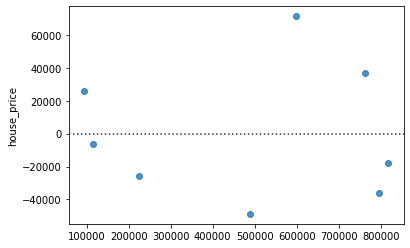

In [40]:
sns.residplot(linreg.predict(X_train),y_train)               

**Step 6:** Predict the response for a new data point

This is the exciting bit! New observations are called "out-of-sample" data. Our model uses the information it learned during the model training process.

Let's ask the model to make two predictions:

* One in a house where the internal area is 150m2
* One in a house where the internal area is 50m2

To do this, our feature matrix is always a 2-D array where each row is a list of features. Since we only have a single feature, the youth population, each row will contain only a single value.


In [41]:
X_new = [[150], [50]]
linreg.predict(X_new)


array([762959.42062306, 214781.46913438])

## <font color='red'> Exercise: Linear regression with multiple features
    
Now let's use both features in our dataset to run our linear regression model. Now, the equation we're trying to fit looks like:

`house price = a0 + a1*internal area + a2*bedrooms`

Fill in the gaps in the code below to fit and evaluate the model.


Let's remind ourselves of what our data looks like.

In [ ]:
house_df.head()

Now let's split out our features and dependent variable, and our training and testing sets. **Keep random state as 42**

In [ ]:
X = house_df[[ # fill this in ]] # features: instead of having a single feature here, we want to use TWO columns from our dataset
y = house_df[# fill this in ] # labels

X_train, X_test, y_train, y_test = train_test_split(# fill this in  random_state=42)

Let's now initialise our linear regression model

In [ ]:
linreg_2 =  # fill this in

And let's fit it to our data...

In [ ]:
linreg_2.fit(# fill this in )

What are the intercepts and coefficients?

In [ ]:
linreg_2.# fill this in 

In [ ]:
linreg_2.# fill this in 

We can interpret this to mean that if we hold internal area constant, every extra bedroom will add around £600 to the house price.

And if we hold bedroom numbers constant, every extra square metre will add around £5500 to the house price.

Now, get the training error of the model.

In [ ]:
mse = mean_squared_error(# fill this in )
rmse = np.sqrt(mse)

print('Mean squared TRAINING error: %f'% mse)
print('Root mean squared TRAINING error: %f'% rmse)


And the testing error...

In [ ]:
mse = mean_squared_error(# fill this in )
rmse = np.sqrt(mse)

print('Mean squared TESTING error: %f'% mse)
print('Root mean squared TESTING error: %f'% rmse)

How does this compare to the baseline model?

In [ ]:
null_model = np.mean(y_train)*np.ones(len(y_test))

mse = mean_squared_error(y_test, null_model)
rmse = np.sqrt(mse)

print('Baseline model mean squared error: %f'% mse)
print('Baseline model root mean squared error: %f'% rmse)

## <font color='red'> Exercise 2: Linear regression to predict house sale price

Now let's try this method out with a much bigger, real life dataset! 

Read in the dataset, which describes house prices and other features collected from Boston and downloaded from Kaggle: https://www.kaggle.com/prasadperera/the-boston-housing-dataset

Read the dictionary, which you can find here. Familiarise yourself with the features in the dataset.

What does each row represent? What does each column represent?

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000USD
* PTRATIO - pupil-teacher ratio by town
* LSTAT - \% lower status of the population
* MEDV - Median value of owner-occupied homes in 1000USDs


In [ ]:
housing_df = pd.read_csv('boston_housing.csv')
housing_df.head()

In [ ]:
housing_df.shape

Inspect missing values, and remove rows with `NaN` values using the ``dropna()`` function.

In [ ]:
housing_df.shape

Split the data into 70% training, 30% testing

In [ ]:

X = 
y = 
X_train, X_test, y_train, y_test = 


## Inspect the data

Use `sns.pairplot`, `sns.heatmap`, `describe` and `corr` to:

(a) Create a pairplot of some of the different pairings of variables in our dataset (this might take a while depending on how fast your laptop is!)

(b) Generate a correlation matrix

(c) Visualise the correlation matrix with a heatmap

Then, by visual inspection, discuss the following questions in your groups:

(a) Which column is the target, or independent variable?

(b) Which variables look like they're most strongly associated or correlated with house price?

(c) Do the associations make intuitive sense? If not, why not? 

(d) Do some of the associations look like they describe causal relationships? Which ones? 

(e) Which of your variables are normally distributed with no significant outliers?

**Decide which features to include in your model, using your knowledge of which features are normally distributed, and have significant outliers***


##  Fit a linear regression model

Initialise and fit a linear regression model using scikit-learn

In [ ]:
house_regression = 


Now calculate the mean squared error of our trained model.

In [ ]:
y_train_pred = 


In [ ]:
from sklearn.metrics import mean_squared_error

mse = 
rmse = 

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Produce a residual plot to assess the goodness of fit of the model.

## Test your linear model on out of sample data

Now we've trained our simple linear model, we can read in our testing data. 

In [ ]:
y_pred =


We can also evaluate the accuracy of our model on unseen data, using root mean squared error

In [ ]:
mse = 
rmse = 

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Let's compare this to the performance of the baseline model.

In [ ]:
y_null = 

mse =
rmse = 

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Discuss the following questions:

* Why is the testing accuracy of the model worse than the training accuracy?

* Does our linear regression model perform better than the null model?